## DECISION TREE
### Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
### Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features
### Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


In [67]:
# 1. Data Preparation:
# Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\11. Decision Tree\\heart_disease.xlsx",sheet_name=0)
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [68]:
df=pd.read_excel("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\11. Decision Tree\\heart_disease.xlsx",sheet_name=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [69]:
# 2. Exploratory Data Analysis (EDA):
# Perform exploratory data analysis to understand the structure of the dataset.
# Check for missing values, outliers, and inconsistencies in the data.
# Visualize the distribution of features, including histograms, box plots, and correlation matrices.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [70]:
df.shape

(908, 13)

In [71]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,reversable defect,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,372,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [73]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,normal,4


In [74]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [75]:
# OUTLIER DETECTION 
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_dict = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_dict[col] = outliers

print("OUTLIERS DETECTED:")
for col, count in outlier_dict.items():
    print(f"{col}: {count}")

OUTLIERS DETECTED:
age: 1
trestbps: 22
chol: 187
thalch: 1
oldpeak: 16
num: 0


In [76]:
import pandas as pd
import numpy as np

# Load dataset

df=pd.read_excel("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\11. Decision Tree\\heart_disease.xlsx",sheet_name=1)

print("1.CHECK WRONG DATA TYPES")
print(df.dtypes)

# 2. CHECK NEGATIVE OR IMPOSSIBLE VALUES

print("2.IMPOSSIBLE VALUES CHECK")

# Age must be between 0 and 120
age_issues = df[(df['age'] < 0) | (df['age'] > 120)]
print("Invalid age values:")
print(age_issues)

# Blood pressure cannot be zero or negative
bp_issues = df[df['trestbps'] <= 0]
print("Invalid blood pressure values:")
print(bp_issues)

# Cholesterol must be > 0
chol_issues = df[df['chol'] <= 0]
print("Invalid cholesterol values:")
print(chol_issues)

# Oldpeak (ST depression) cannot be negative
oldpeak_issues = df[df['oldpeak'] < 0]
print("Invalid oldpeak values:")
print(oldpeak_issues)

# 3. CHECK DUPLICATE ROWS

duplicates = df[df.duplicated()]
print("\n3. DUPLICATES FOUND")
print(duplicates)

# 4. CHECK CATEGORICAL INCONSISTENCIES

print("\n4. CATEGORICAL VALUE CHECKS")

# Allowed categories (based on standard Heart Disease dataset)
allowed_sex = ['0', '1']
allowed_cp = ['0', '1', '2', '3']
allowed_restecg = ['0', '1', '2']
allowed_exang = ['0', '1']
allowed_slope = ['0', '1', '2']
allowed_thal = ['0', '1', '2', '3']
allowed_target = [0, 1]

print("Invalid values in 'sex':")
print(df[~df['sex'].astype(str).isin(allowed_sex)])

print("Invalid values in 'cp':")
print(df[~df['cp'].astype(str).isin(allowed_cp)])

print("Invalid values in 'restecg':")
print(df[~df['restecg'].astype(str).isin(allowed_restecg)])

print("Invalid values in 'exang':")
print(df[~df['exang'].astype(str).isin(allowed_exang)])

print("Invalid values in 'slope':")
print(df[~df['slope'].astype(str).isin(allowed_slope)])

print("Invalid values in 'thal':")
print(df[~df['thal'].astype(str).isin(allowed_thal)])

print("Invalid values in 'num' (target):")
print(df[~df['num'].isin(allowed_target)])

1.CHECK WRONG DATA TYPES
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object
2.IMPOSSIBLE VALUES CHECK
Invalid age values:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, thal, num]
Index: []
Invalid blood pressure values:
     age   sex           cp  trestbps  chol    fbs restecg  thalch  exang  \
842   55  Male  non-anginal         0     0  False  normal     155  False   

     oldpeak slope          thal  num  
842      1.5  flat  fixed defect    3  
Invalid cholesterol values:
     age   sex               cp  trestbps  chol    fbs           restecg  \
152   56  Male      non-anginal       120     0  False            normal   
176   60  Male     asymptomatic       120     0  False            normal   
185   60  M

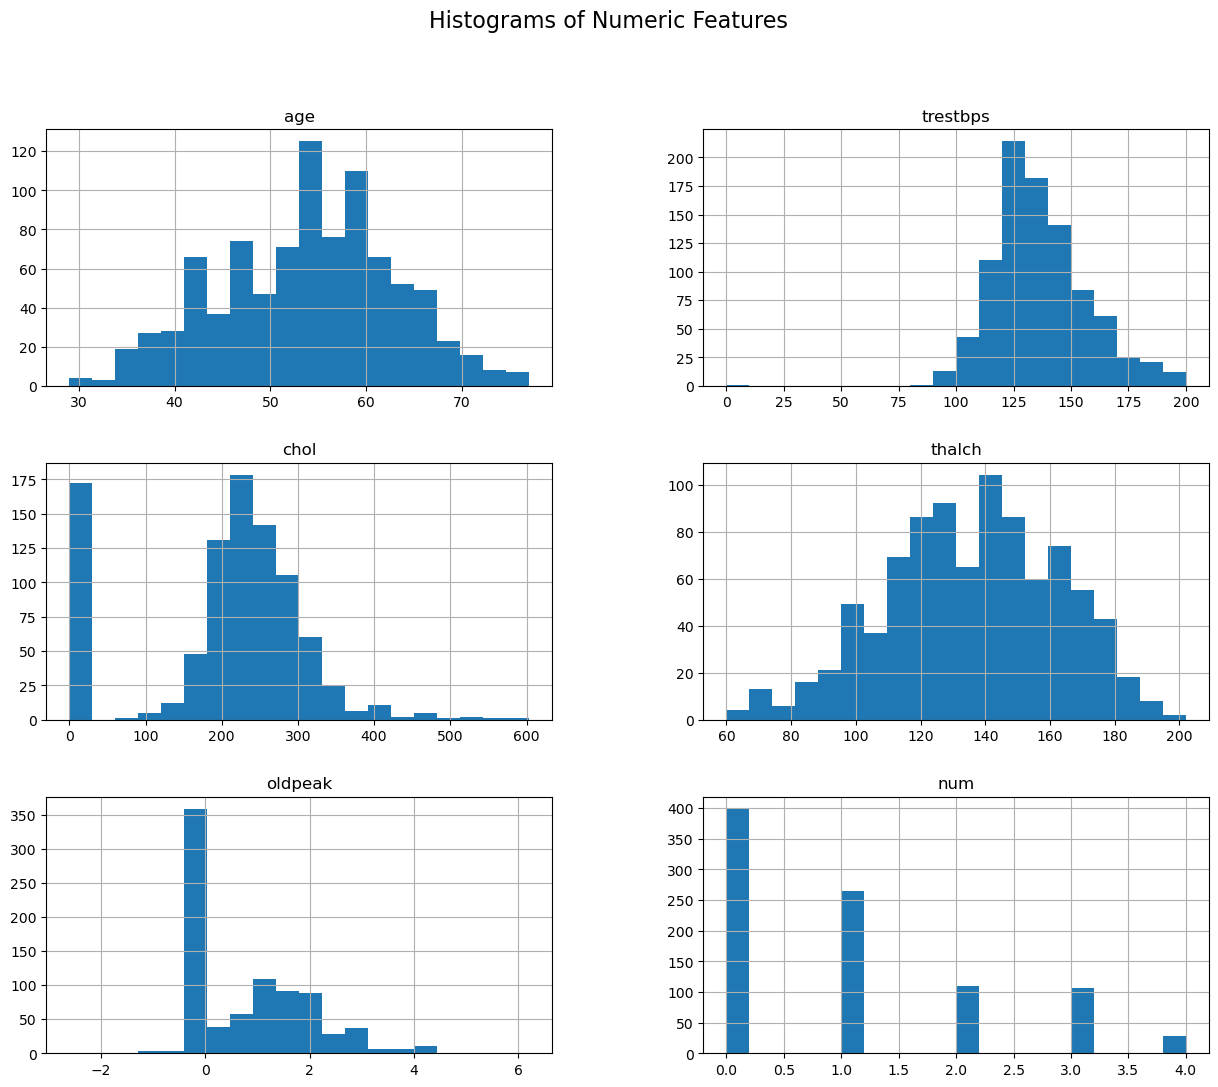

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

#  HISTOGRAMS

df[numeric_cols].hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


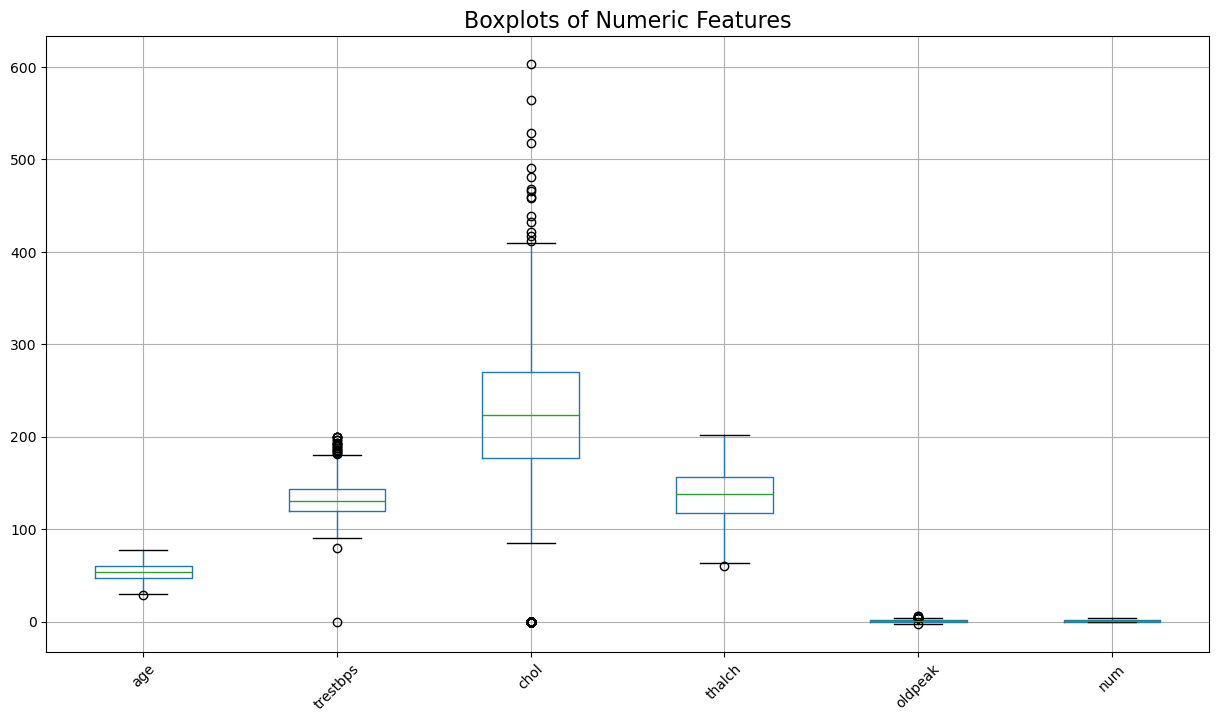

In [78]:
#  BOXPLOTS (for outlier visualization)

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

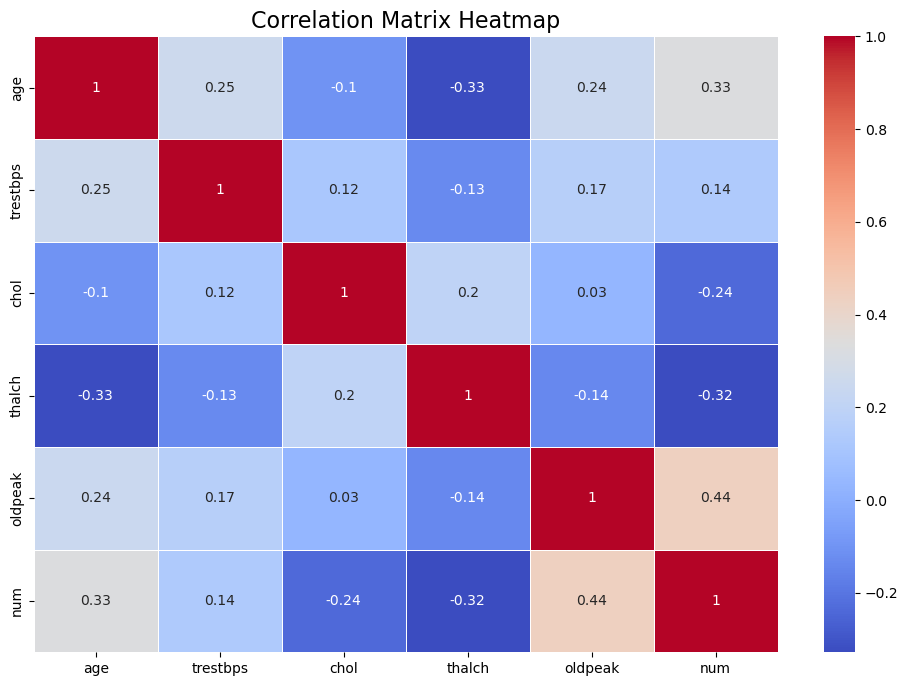

In [79]:
# CORRELATION MATRIX HEATMAP

plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [80]:
# 3. Feature Engineering:
# If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

print("Original Data Shape:", df.shape)
print(df.head())

# HANDLE MISSING VALUES

# Numerical columns → fill with median

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical columns → fill with mode

cat_cols = df.select_dtypes(include=['object', 'bool']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Missing values after imputation:")
print(df.isnull().sum())

# ENCODING CATEGORICAL VARIABLES 

label_enc = LabelEncoder()

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col].astype(str))

print("Categorical Columns Encoded:")
print(df.head())

# FEATURE SCALING

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Scaled Numeric Features:")
print(df[num_cols].head())

# FINAL CLEANED DATASET READY FOR MODELING

print("Final Data Shape:", df.shape)
df.to_csv("cleaned_heart_disease.csv", index=False)

print("File saved: cleaned_heart_disease.csv")

Original Data Shape: (908, 13)
   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slo

In [81]:
# 4. Decision Tree Classification:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target (y)
X = df.drop("num", axis=1)   
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,      # 20% test data
    random_state=42,     # for reproducibility
    stratify=y           # ensures equal class distribution
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (726, 12)
Testing features shape: (182, 12)
Training labels shape: (726,)
Testing labels shape: (182,)


In [82]:
df=pd.read_excel("C:\\Users\\moulika\\Downloads\\Excler_Assignment\\11. Decision Tree\\heart_disease.xlsx",sheet_name=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


Accuracy: 0.47802197802197804

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70        80
           1       0.41      0.40      0.40        53
           2       0.15      0.18      0.17        22
           3       0.29      0.29      0.29        21
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.48      0.48      0.48       182



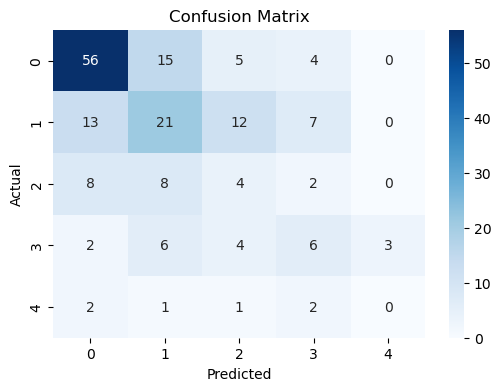

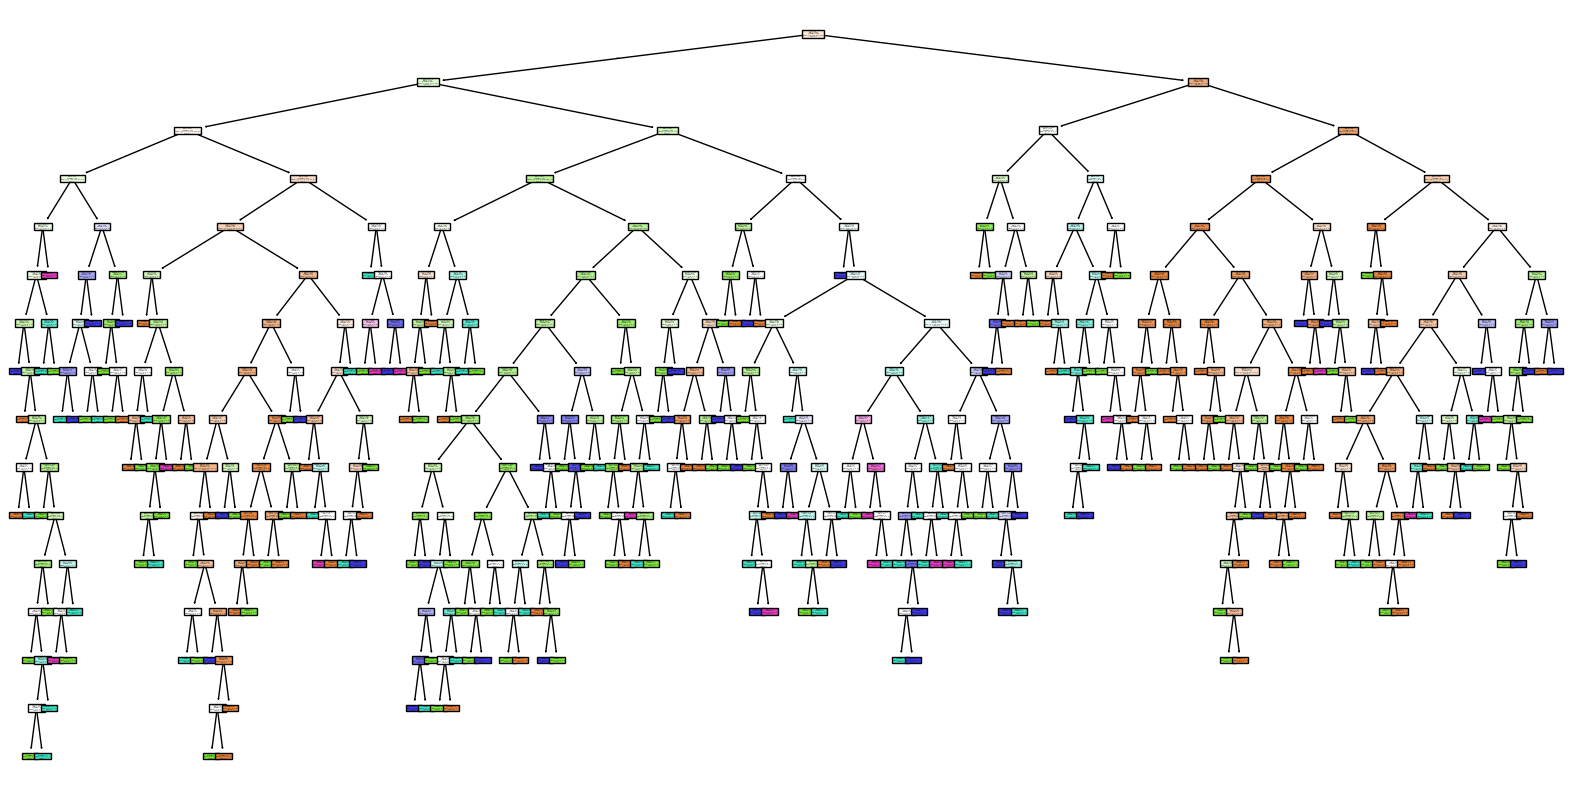

In [84]:
# Implement a Decision Tree Classification model using a library like scikit-learn.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# df is already loaded
# df = pd.read_excel("your_file.xlsx", sheet_name=1)

# Separate features and target
X = df.drop("num", axis=1)
y = df["num"]

# -----------------------------------------------------------
# FIX → Convert ALL columns to string to avoid mixed dtype
# -----------------------------------------------------------
for col in X.columns:
    X[col] = X[col].astype(str)

# -----------------------------------------------------------
# Apply Ordinal Encoding on ALL columns
# -----------------------------------------------------------
encoder = OrdinalEncoder()
X = pd.DataFrame(encoder.fit_transform(X), columns=X.columns)

# -----------------------------------------------------------
# Train-Test Split
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -----------------------------------------------------------
# Decision Tree Model
# -----------------------------------------------------------
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.show()


In [85]:
# Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
# Convert num to binary target
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

# Separate X and y
X = df.drop("num", axis=1)
y = df["num"]

# Convert all X columns to string type
X = X.astype(str)

# Encode categorical columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = pd.DataFrame(enc.fit_transform(X), columns=X.columns)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import *
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7417582417582418
Precision: 0.7722772277227723
Recall: 0.7647058823529411
F1 Score: 0.7684729064039408
ROC-AUC: 0.7386029411764705

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71        80
           1       0.77      0.76      0.77       102

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



In [86]:
# 5. Hyperparameter Tuning:
# Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6, 8, 10, 12],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                        # 5-fold cross validation
    scoring='accuracy',          # optimize accuracy
    n_jobs=-1                    # use all CPU cores
)

grid_search.fit(X_train, y_train)

print("Best Parameters Found:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Accuracy:")
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_best))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

Best Parameters Found:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Cross-Validation Accuracy:
0.7741048653755315

Test Accuracy: 0.7857142857142857
Precision: 0.7837837837837838
Recall: 0.8529411764705882
F1 Score: 0.8169014084507042
ROC-AUC: 0.7824754901960784

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.70      0.74        80
           1       0.78      0.85      0.82       102

    accuracy                           0.79       182
   macro avg       0.79      0.78      0.78       182
weighted avg       0.79      0.79      0.78       182



MODEL PERFORMANCE
Accuracy      : 0.7417582417582418
Precision     : 0.7722772277227723
Recall        : 0.7647058823529411
F1-score      : 0.7684729064039408
ROC-AUC       : 0.7386029411764705
CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           0       0.70      0.71      0.71        80
           1       0.77      0.76      0.77       102

    accuracy                           0.74       182
   macro avg       0.74      0.74      0.74       182
weighted avg       0.74      0.74      0.74       182



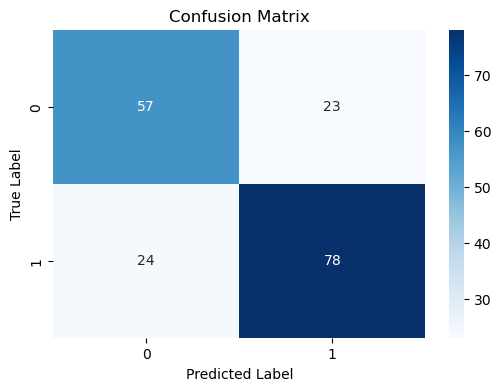

ANALYSIS
The model's accuracy (0.74) is moderate; the tree may be overfitting or underfitting.
High precision (0.77) indicates the model makes few false positive predictions.
Recall (0.76) shows the model is effective at identifying true disease cases.
F1-score (0.77) is strong, showing a balance between precision and recall.
ROC-AUC score (0.74) shows how well the model separates the two classes. Higher is better.


In [87]:
# 6. Model Evaluation and Analysis:
# Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # for ROC-AUC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("MODEL PERFORMANCE")
print("Accuracy      :", accuracy)
print("Precision     :", precision)
print("Recall        :", recall)
print("F1-score      :", f1)
print("ROC-AUC       :", roc_auc)

print("CLASSIFICATION REPORT ")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("ANALYSIS")

if accuracy > 0.80:
    print(f"The model's accuracy ({accuracy:.2f}) is good and indicates that the Decision Tree correctly predicts most samples.")
else:
    print(f"The model's accuracy ({accuracy:.2f}) is moderate; the tree may be overfitting or underfitting.")

if precision > 0.75:
    print(f"High precision ({precision:.2f}) indicates the model makes few false positive predictions.")
else:
    print(f"Precision ({precision:.2f}) is low; the model may be predicting positive cases incorrectly.")

if recall > 0.75:
    print(f"Recall ({recall:.2f}) shows the model is effective at identifying true disease cases.")
else:
    print(f"Recall ({recall:.2f}) is low; the model is missing some disease cases.")

if f1 > 0.75:
    print(f"F1-score ({f1:.2f}) is strong, showing a balance between precision and recall.")
else:
    print(f"F1-score ({f1:.2f}) indicates imbalance between precision and recall.")
print(f"ROC-AUC score ({roc_auc:.2f}) shows how well the model separates the two classes. Higher is better.") 


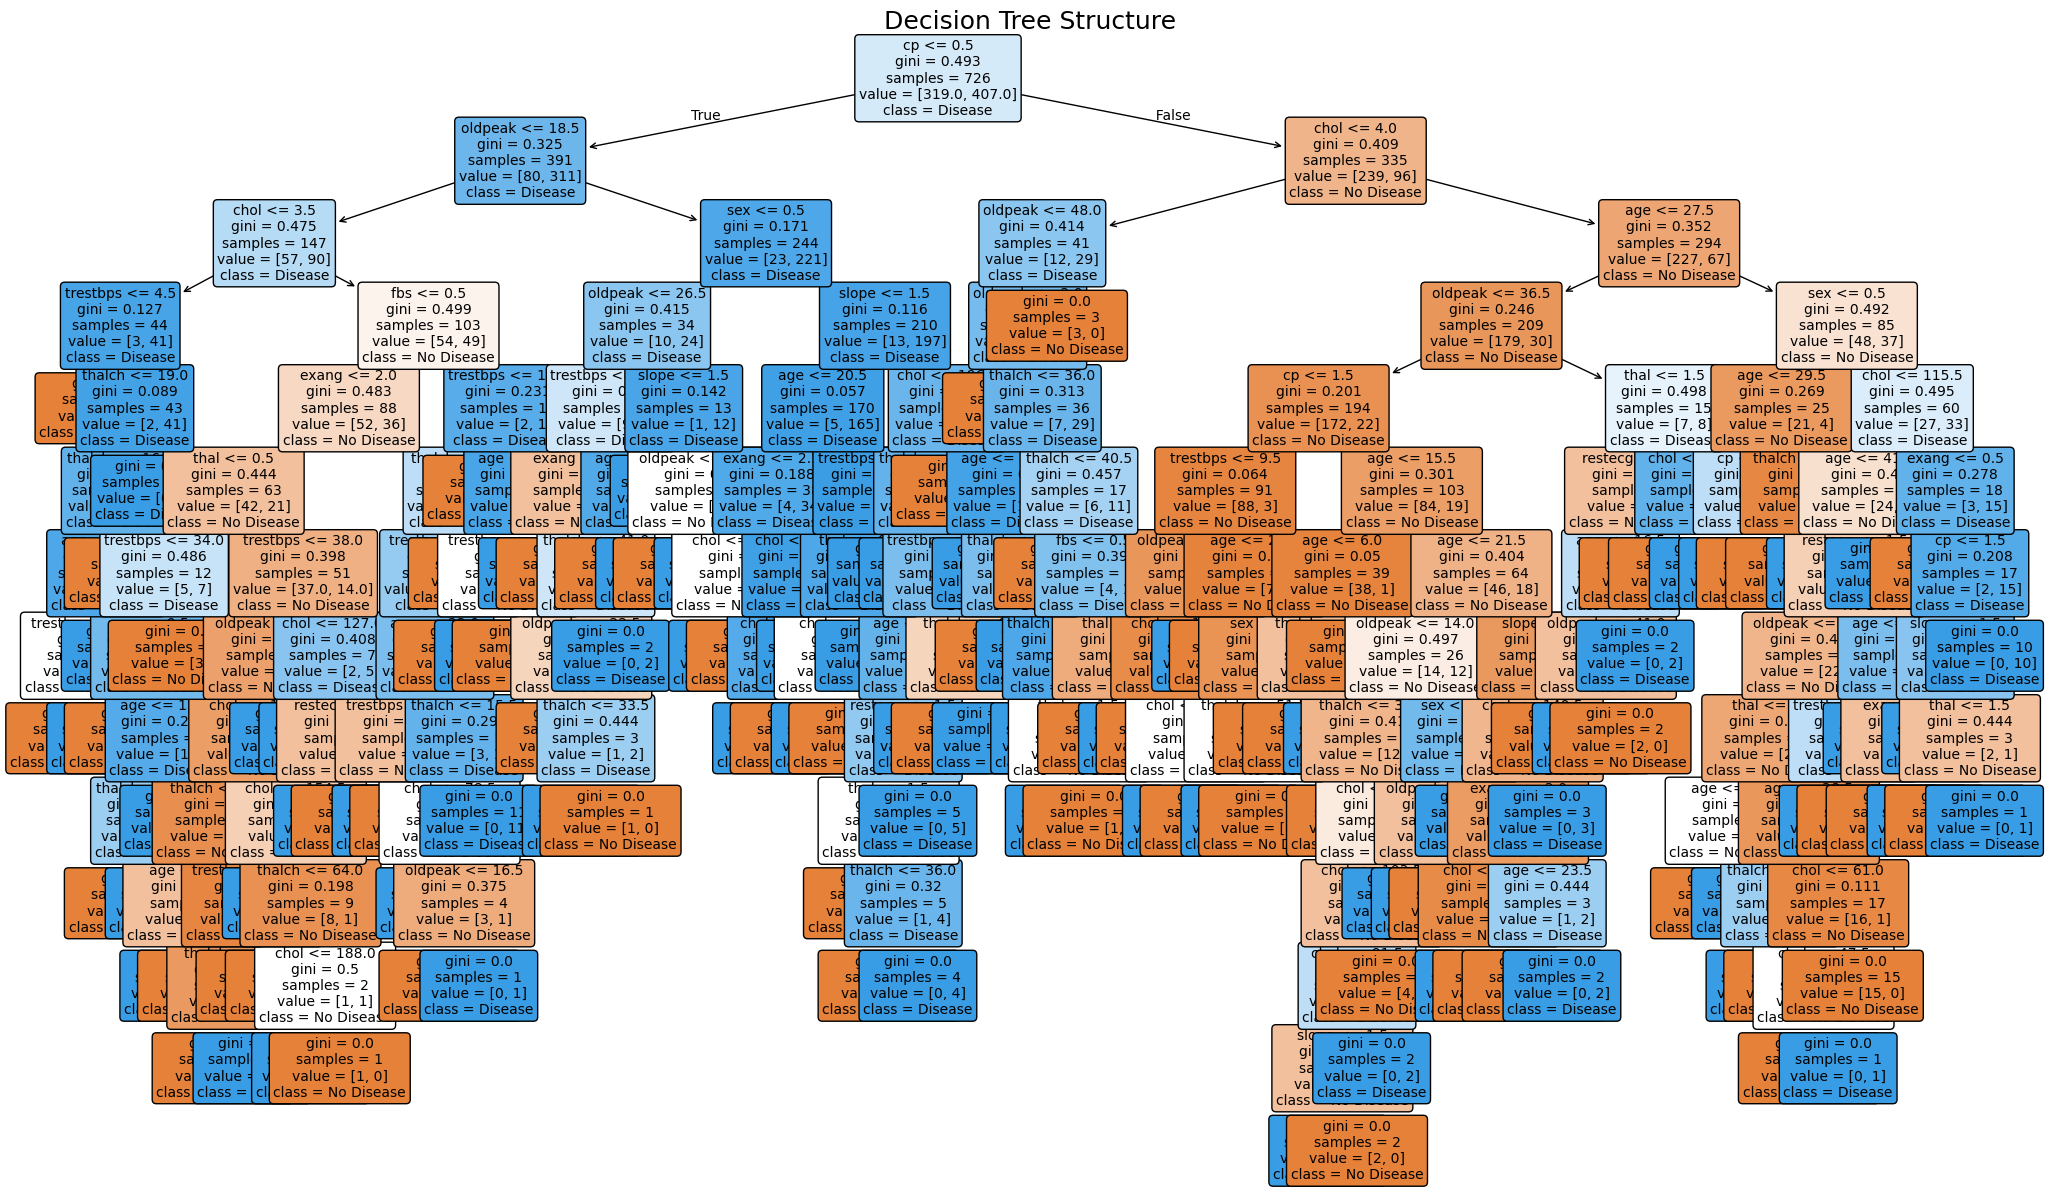

In [88]:
# Visualize the decision tree structure to understand the rules learned by the model and identify important features
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))

plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],   # OR use model.classes_
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Structure", fontsize=18)
plt.show()

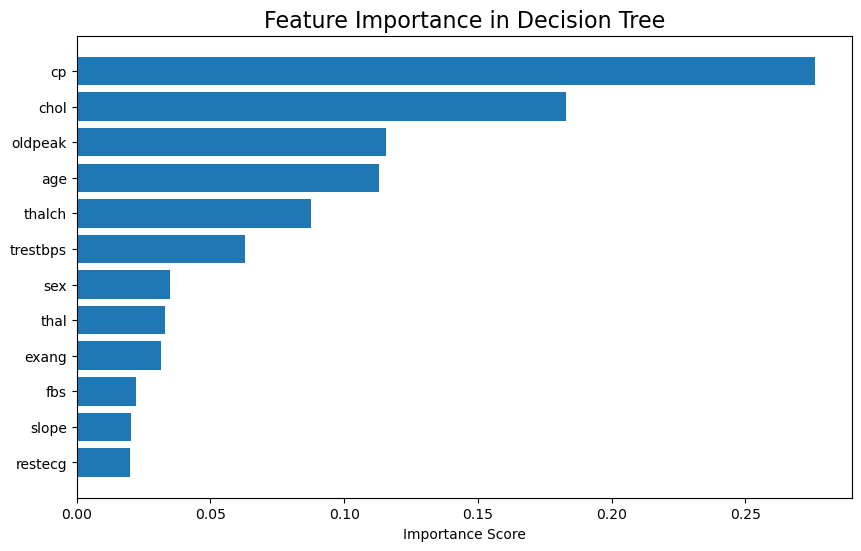

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe for plotting
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance in Decision Tree", fontsize=16)
plt.xlabel("Importance Score")
plt.show()

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
### Some common hyperparameters of decision tree models include:
- <b>max_depth:</b> Controls the maximum depth of the tree. A deeper tree can capture more complex patterns but may lead to overfitting.
- <b>min_samples_split:</b> The minimum number of samples required to split an internal node. A higher value can prevent overfitting by making the tree more generalized.
- <b>criterion:</b> The function used to measure the quality of a split (e.g., 'gini' for Gini impurity, 'entropy' for information gain). The choice of criterion can affect how the tree splits the data.

## 2. What is the difference between the Label encoding and One-hot encoding?
Label encoding converts categorical variables into numerical format by assigning a unique integer to each category. One-hot encoding, creates binary columns for each category, indicating the presence or absence of that category in the data. Label encoding is more memory efficient but can introduce ordinal relationships that may not exist, while one-hot encoding avoids this issue but can lead to a high-dimensional feature space.